<a href="https://colab.research.google.com/github/ChetanaRajabhoj/kagglex-project/blob/dev/notebooks/5_0_cr_model_2_isolation_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [54]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
from sklearn.ensemble import IsolationForest

# Read Data

In [55]:
# dfcpu = pd.read_csv('../data/processed/cpu4.csv')
dfcpu = pd.read_csv('https://raw.githubusercontent.com/ChetanaRajabhoj/kagglex-project/main/data/processed/cpu4.csv')
dfcpu

,datetime,timestamp,value,label,date,time,month,day,hour,minute,...,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour.1,hour_sin,hour_cos
0,2016-07-24 16:00:00,1469376000,0.847300,0,2016-07-24,16:00:00,July,Sunday,16,0,...,0,0,0,0,0,0,0,16,-0.866025,-0.500000
1,2016-07-24 16:05:00,1469376300,-0.036137,0,2016-07-24,16:05:00,July,Sunday,16,5,...,0,0,0,0,0,0,0,16,-0.866025,-0.500000
2,2016-07-24 16:10:00,1469376600,0.074292,0,2016-07-24,16:10:00,July,Sunday,16,10,...,0,0,0,0,0,0,0,16,-0.866025,-0.500000
3,2016-07-24 16:15:00,1469376900,0.074292,0,2016-07-24,16:15:00,July,Sunday,16,15,...,0,0,0,0,0,0,0,16,-0.866025,-0.500000
4,2016-07-24 16:20:00,1469377200,-0.036137,0,2016-07-24,16:20:00,July,Sunday,16,20,...,0,0,0,0,0,0,0,16,-0.866025,-0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17563,2016-09-23 15:35:00,1474644900,0.074292,0,2016-09-23,15:35:00,September,Friday,15,35,...,0,0,0,0,0,0,0,15,-0.707107,-0.707107
17564,2016-09-23 15:40:00,1474645200,0.295152,0,2016-09-23,15:40:00,September,Friday,15,40,...,0,0,0,0,0,0,0,15,-0.707107,-0.707107
17565,2016-09-23 15:45:00,1474645500,0.074292,0,2016-09-23,15:45:00,September,Friday,15,45,...,0,0,0,0,0,0,0,15,-0.707107,-0.707107
17566,2016-09-23 15:50:00,1474645800,-0.146567,0,2016-09-23,15:50:00,September,Friday,15,50,...,0,0,0,0,0,0,0,15,-0.707107,-0.707107


# Model 1 - Time Variables - hour and minute

In [56]:
columnlist = [ 'datetime','value','hour','minute', 'label']
data = dfcpu[columnlist].copy().set_index('datetime')
data

,value,hour,minute,label
datetime,,,,
2016-07-24 16:00:00,0.847300,16,0,0
2016-07-24 16:05:00,-0.036137,16,5,0
2016-07-24 16:10:00,0.074292,16,10,0
2016-07-24 16:15:00,0.074292,16,15,0
2016-07-24 16:20:00,-0.036137,16,20,0
...,...,...,...,...
2016-09-23 15:35:00,0.074292,15,35,0
2016-09-23 15:40:00,0.295152,15,40,0
2016-09-23 15:45:00,0.074292,15,45,0


In [57]:
# Noramalize values
scaler = MinMaxScaler(feature_range=(0, 1))
data['value'] = scaler.fit_transform(data['value'].values.reshape(-1, 1))
data

,value,hour,minute,label
datetime,,,,
2016-07-24 16:00:00,0.450980,16,0,0
2016-07-24 16:05:00,0.294118,16,5,0
2016-07-24 16:10:00,0.313725,16,10,0
2016-07-24 16:15:00,0.313725,16,15,0
2016-07-24 16:20:00,0.294118,16,20,0
...,...,...,...,...
2016-09-23 15:35:00,0.313725,15,35,0
2016-09-23 15:40:00,0.352941,15,40,0
2016-09-23 15:45:00,0.313725,15,45,0


## Split Data 

In [58]:
train = data.loc[data.index < '2016-09-01']
test = data.loc[data.index >= '2016-09-01']
print(train.shape, test.shape)
print(train.label.value_counts())
print(test.label.value_counts())

(11040, 4) (6528, 4)
0    10855
1      185
Name: label, dtype: int64
0    6504
1      24
Name: label, dtype: int64


In [59]:
train = train.values
test = test.values
X_train, y_train= train[:,0:-1], train[:,-1]
X_test, y_test= test[:,0:-1], test[:,-1]
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((11040, 3), (11040,), (6528, 3), (6528,))

## Define and Fit Model

In [60]:
outliers_fraction = float(.05)
# train isolation forest
model_IF =  IsolationForest(contamination=outliers_fraction) # contamination parameter sets the percentage of points in our data to be anomalous.
model_IF.fit(X = X_train, y= y_train)

IsolationForest(contamination=0.05)

## Predict on Test data

In [61]:
anomaly_scores = model_IF.decision_function(X_test)
y_pred = model_IF.predict(X_test)

In [62]:
anomaly_scores

array([0.00641041, 0.02349996, 0.02274385, ..., 0.08356741, 0.0679474 ,
       0.05978852])

In [63]:
np.unique(y_pred)

array([-1,  1])

In [64]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
np.unique(y_pred)

array([0, 1])

In [65]:
df = pd.DataFrame({'label': y_test, 'pred': y_pred}, columns=['label', 'pred'])

## Plot Confusion Matrix, Metrics

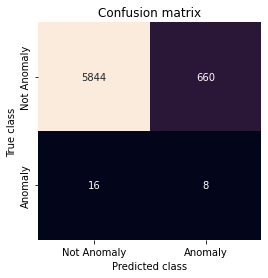

 F1-Score:  0.023121387283236993
 Recall:  0.3333333333333333
 Precision:  0.011976047904191617


In [66]:
LABELS = ["Not Anomaly","Anomaly"]

conf_matrix = confusion_matrix(df.label, df.pred)
# print(conf_matrix)
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cbar=False);
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
# print Accuracy, precision and recall
print(" F1-Score: ",metrics.f1_score(df.label, df.pred))
print(" Recall: ",recall_score(df.label, df.pred))
print(" Precision: ",precision_score(df.label, df.pred))